# US market analysis

## Import and cleaning data

### Import data ship price border

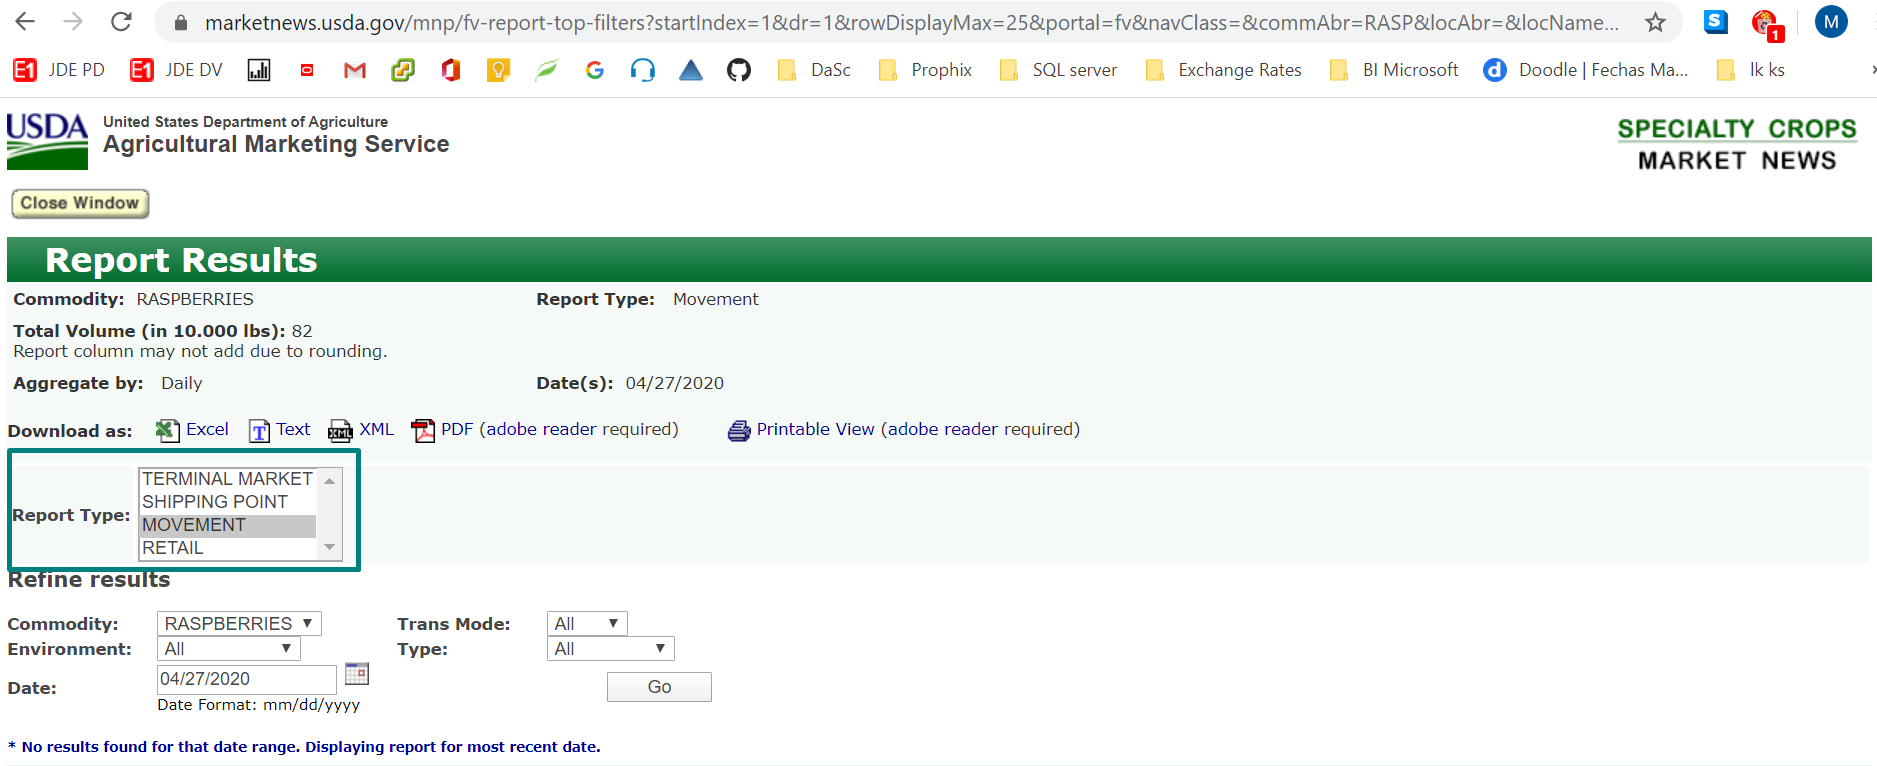

In [14]:
from IPython.display import Image
Image("Data/Website.png")

In [122]:
crop = 'STRAWBERRIES'
crop_abb = 'STRBY'
conv_package_un = 8 * 0.453592
lb_to_kg = 0.453592 #0.0283495*72

In [49]:
# Importing libraries 
import pandas as pd 
from datetime import date

# Setting dates
# Date from
fday = '01'
fmonth = '01'
fyear = '2017'

# Date to : current date data to collect updated information
tday = date.today().strftime('%d')
tmonth = date.today().strftime('%m')
tyear = date.today().strftime('%Y')

# URL for accessing shipping point prices
USprices = f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters\
?&commAbr={crop_abb}&varName=&locAbr=&repType=shipPriceDaily\
&navType=byComm&locName=&navClass=&type=shipPrice&dr=1&volume=&commName={crop}&portal=fv&region=\
&navClassFRUITS=&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"

# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USprices,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = f'./Data/{crop}/USMXprices.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
prices = pd.DataFrame()
prices = pd.read_excel(file_path\
                    ,header=0)

### Analyize data

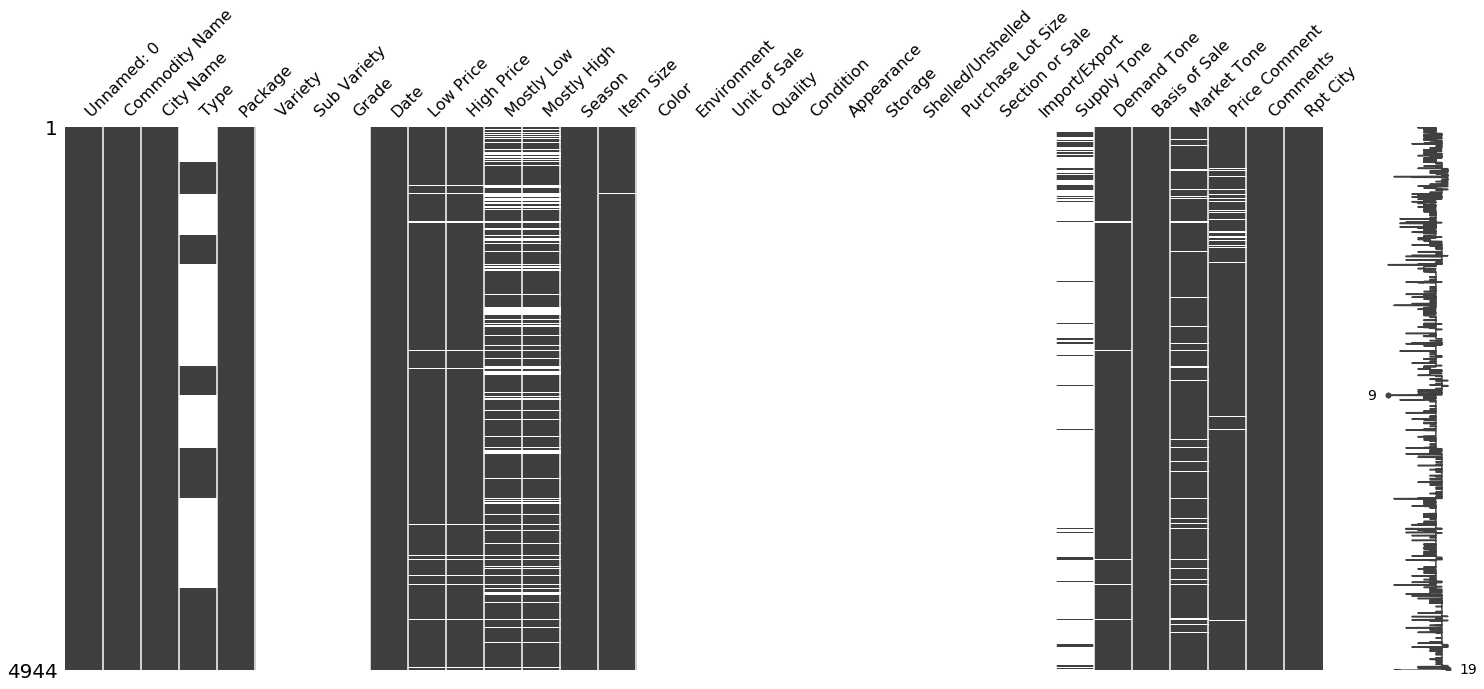

In [50]:
import missingno as msno
msno.matrix(prices)

In [51]:
prices.groupby('Type')['Date'].nunique()

Type
Organic    822
Name: Date, dtype: int64

In [52]:
prices.groupby('Type')['Date'].nunique()

Type
Organic    822
Name: Date, dtype: int64

In [53]:
prices.groupby('Item Size')['Date'].nunique()

Item Size
lge           42
lge-exlge      2
med          670
med-lge      430
sml-med      372
Name: Date, dtype: int64

In [54]:
prices.groupby('Package')['Date'].nunique()

Package
flats 8 1-lb containers with lids    831
Name: Date, dtype: int64

In [55]:
prices.groupby('Commodity Name')['Date'].nunique()

Commodity Name
STRAWBERRIES    831
Name: Date, dtype: int64

In [26]:
prices.to_excel(f'./Results/{crop}/prices.xlsx')

### Cleanance

<ul>
<li><input type="checkbox" disabled> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [60]:
prices = prices[(prices['City Name'].astype(str).str[:6] == 'MEXICO') \
       & (prices['Low Price'].notnull()) & (prices['High Price'].notnull()) \
       & (prices['Type'] != 'Organic')].groupby('Date')['Low Price','High Price'].agg('mean').reset_index()

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [61]:
prices['Avg Price'] = prices[['Low Price','High Price']].mean(axis=1)

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [62]:
prices.drop(axis=1, columns=['Low Price','High Price','City Name','Package','Mostly Low','Mostly High','Commodity Name','Season'],inplace=True)

KeyError: "['City Name' 'Package' 'Mostly Low' 'Mostly High' 'Commodity Name'\n 'Season'] not found in axis"

In [63]:
prices.set_index('Date',inplace=True)

In [64]:
prices_complete = prices.resample('D').fillna('nearest')

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

### Import data movement quantities

In [65]:
# URL for accessing quantities
USquantity =f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters?\
&commAbr={crop_abb}&varName=&locAbr=&repType=movementDaily\
&navType=byComm&locName=&navClass=&navClass=&type=movement&dr=1\
&volume=&commName={crop}&portal=fv&region=\
&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"    


# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USquantity,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = f'./Data/{crop}/USMXquantity.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
quantity = pd.DataFrame()
quantity = pd.read_excel(file_path\
                    ,header=0)

### Analyize data

In [66]:
quantity.head()

,Unnamed: 0,Commodity Name,Origin Name,Type,Package,Variety,Date,District,10000lb units,Trans Mode,Package Count,Car/Van Count,Season,Environment,Import/Export,Adjustments
0,0,STRAWBERRIES,ARGENTINA,NaN,NaN,NaN,2019-09-14,IMPORTS THROUGH BROOKLYN (NYC),5,Boat,NaN,NaN,2019,NaN,Import,week ending amount
1,1,STRAWBERRIES,ARGENTINA,NaN,NaN,NaN,2019-10-19,IMPORTS THROUGH PHILADELPHIA-CAMDEN,22,Boat,NaN,NaN,2019,NaN,Import,added for week ending 10/19/2019 on 10/29/2019
2,2,STRAWBERRIES,ARGENTINA,NaN,NaN,NaN,2019-10-26,IMPORTS THROUGH PHILADELPHIA-CAMDEN,10,Boat,NaN,NaN,2019,NaN,Import,added for week ending 10/26/2019 on 11/04/2019
3,3,STRAWBERRIES,ARGENTINA,NaN,NaN,NaN,2019-11-09,IMPORTS THROUGH NEW YORK JFK AIRPORT,0,Air,NaN,NaN,2019,NaN,Import,week ending amount
4,4,STRAWBERRIES,ARGENTINA,NaN,NaN,NaN,2019-12-21,IMPORTS THROUGH OAKLAND,10,Boat,NaN,NaN,2019,NaN,Import,week ending amount


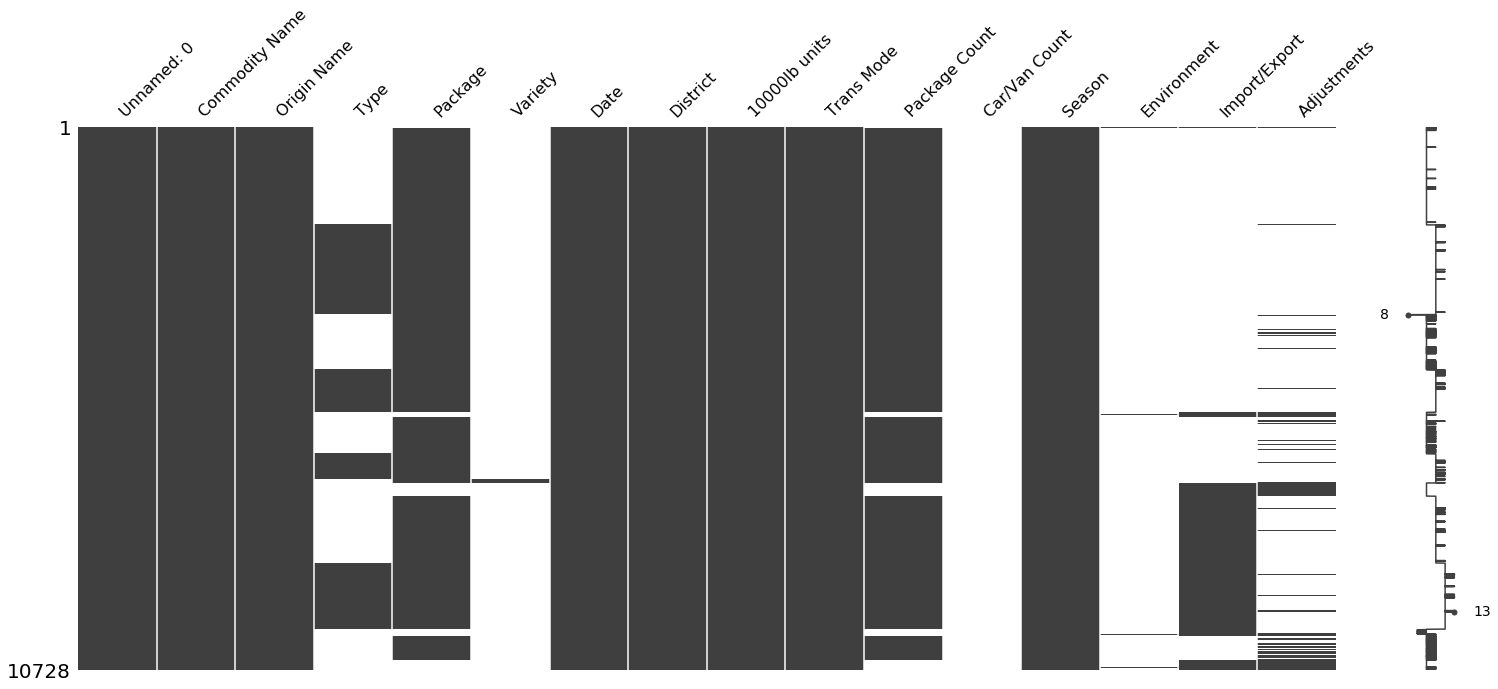

In [67]:
import missingno as msno
msno.matrix(quantity)

In [68]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 16 columns):
Unnamed: 0        10728 non-null int64
Commodity Name    10728 non-null object
Origin Name       10728 non-null object
Type              4422 non-null object
Package           10005 non-null object
Variety           69 non-null object
Date              10728 non-null datetime64[ns]
District          10728 non-null object
10000lb units     10728 non-null int64
Trans Mode        10728 non-null object
Package Count     10005 non-null float64
Car/Van Count     0 non-null float64
Season            10728 non-null int64
Environment       68 non-null object
Import/Export     3347 non-null object
Adjustments       1200 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 1.3+ MB


In [69]:
quantity.groupby('Origin Name')['Date'].nunique()

Origin Name
ARGENTINA                6
BELGIUM                 18
CALIFORNIA-CENTRAL    1092
CALIFORNIA-SOUTH      1000
CANADA                  46
CHILE                   32
COLOMBIA                 3
FLORIDA                596
FRANCE                  33
GUATEMALA                2
JAPAN                   88
MEXICO                 736
MOROCCO                  3
NETHERLANDS             26
NEW ZEALAND              8
NORTH CAROLINA         229
PERU                    46
SOUTH KOREA             40
SPAIN                   56
TURKEY                   6
Name: Date, dtype: int64

In [70]:
quantity = quantity[(quantity['Origin Name']=='MEXICO') \
       & (quantity['10000lb units'].notnull())]

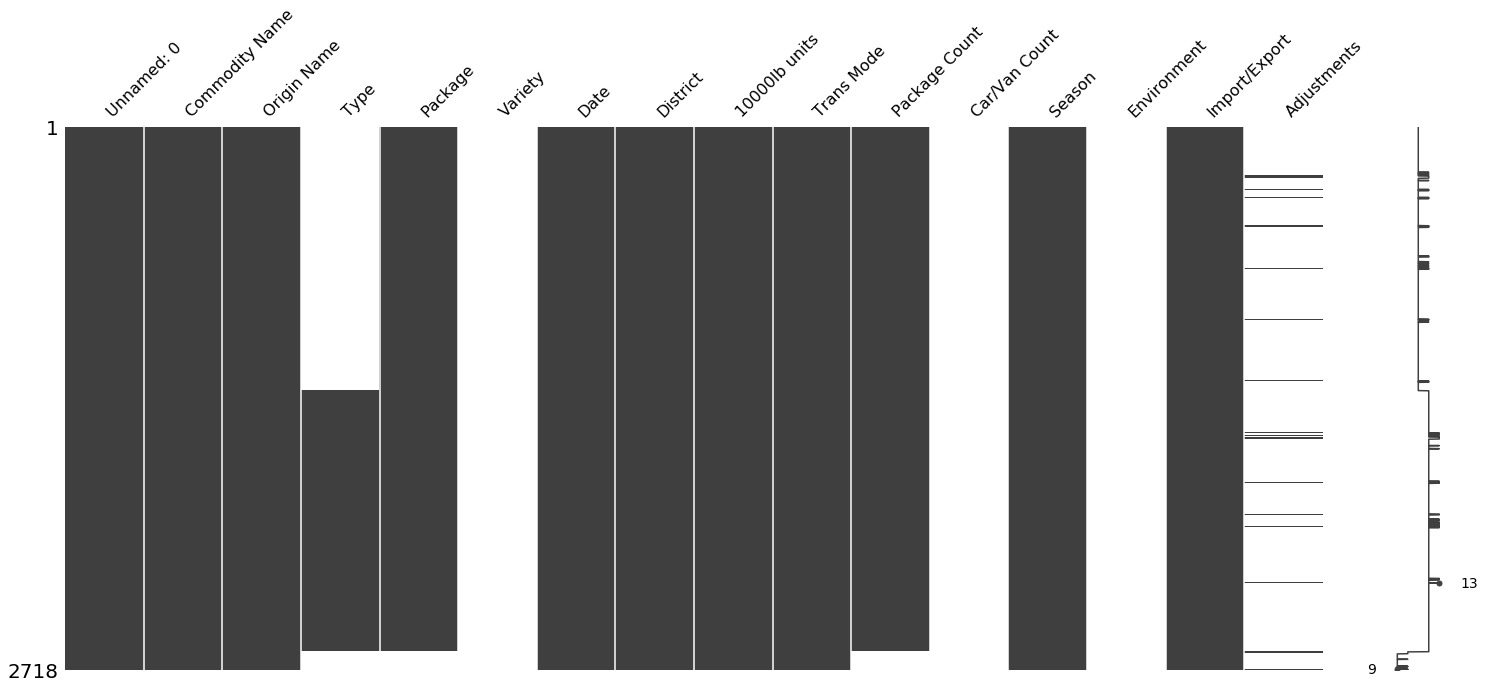

In [71]:
import missingno as msno
msno.matrix(quantity)

In [72]:
quantity.groupby('Type')['Date'].nunique()

Type
Organic    717
Name: Date, dtype: int64

In [77]:
quantity.groupby('Origin Name')['Date'].nunique()

Origin Name
MEXICO    736
Name: Date, dtype: int64

In [78]:
quantity['10000lb units'].sum()

111123

In [79]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 7292 to 10009
Data columns (total 16 columns):
Unnamed: 0        2718 non-null int64
Commodity Name    2718 non-null object
Origin Name       2718 non-null object
Type              1305 non-null object
Package           2625 non-null object
Variety           0 non-null object
Date              2718 non-null datetime64[ns]
District          2718 non-null object
10000lb units     2718 non-null int64
Trans Mode        2718 non-null object
Package Count     2625 non-null float64
Car/Van Count     0 non-null float64
Season            2718 non-null int64
Environment       0 non-null object
Import/Export     2718 non-null object
Adjustments       110 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 361.0+ KB


### Cleanance

In [82]:
quantity = quantity[quantity['Type'] != 'Organic']

In [83]:
quantity_complete = quantity.groupby(['Date'])['10000lb units'].agg('sum').reset_index()

In [84]:
quantity_complete.set_index('Date',inplace=True)

In [85]:
quantity_complete.head()

,10000lb units
Date,
2017-01-01,192
2017-01-02,233
2017-01-03,192
2017-01-04,222
2017-01-05,208


In [86]:
quantity_complete.shape

(731, 1)

### Join prices and quantities

In [87]:
prices_complete.shape

(1212, 3)

In [88]:
df = prices_complete.join(quantity_complete)

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [89]:
df = df.fillna(0)

In [105]:
df['Kg'] = df['10000lb units']*lb_to_kg*10000

In [106]:
df['USDKg'] = df['Avg Price']/conv_package_un

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled checked> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [94]:
df ['USD'] = df['Kg'] * df['USDKg'] 

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled checked> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled checked> Add price*quantity to value imports</li>
</ul>

In [95]:
df.to_excel(f'./Results/{crop}/resultpricesquantity.xlsx')

In [97]:
prices.to_excel(f'./Results/{crop}/prices.xlsx')

### Plotting

In [123]:
prices['Avg Price Kg'] = prices['Avg Price']/(conv_package_un)
quantity_complete['Kg'] = quantity_complete['10000lb units']*lb_to_kg*10000
quantity_complete['Tn'] = quantity_complete['10000lb units']*lb_to_kg*10

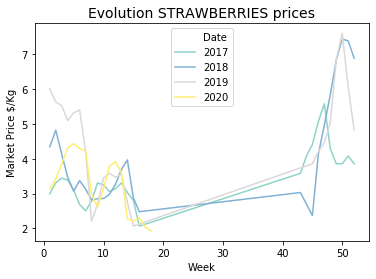

In [124]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

plot_prices = prices.resample('W').mean()
ax = sns.lineplot(x = plot_prices.index.week,
                  y = plot_prices['Avg Price Kg'],
                  hue = plot_prices.index.year,
                  data = plot_prices, palette = "Set3")
plt.title(f'Evolution {crop} prices', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Price $/Kg', fontsize=10)
plt.savefig(f'./Results/{crop}/Evolution_{crop}_US.png')
plot_prices['Week_Num']=plot_prices.index.week
plot_prices.groupby('Week_Num').agg('count')
plt.show()

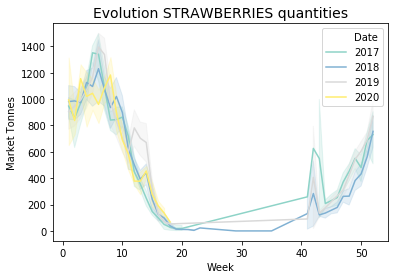

In [119]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

ax = sns.lineplot(x = quantity_complete.index.week,
                  y = quantity_complete['Tn'],
                  hue = quantity_complete.index.year,
                  data = quantity_complete, palette = "Set3")
plt.title(f'Evolution {crop} quantities', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Tonnes', fontsize=10)
plt.savefig(f'./Results/{crop}/Evolution_{crop}_US_Kg.png')
quantity_complete['Week_Num']=quantity_complete.index.week
quantity_complete.groupby('Week_Num').agg('count')
plt.show()

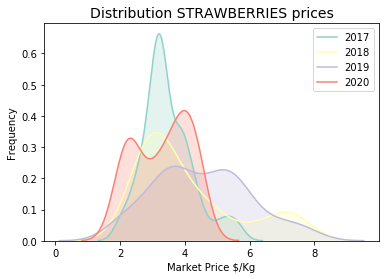

In [120]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plot_prices_na = plot_prices.fillna(-1)

with sns.color_palette("Set3",10):
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2018',before='2017'),label='2017', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2019',before='2018'),label='2018', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2020',before='2019'),label='2019', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title(f'Distribution {crop} prices', fontsize=14)
    plt.xlabel('Market Price $/Kg', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig(f'./Results/{crop}/Distribution_{crop}_US.png')
    plt.show()

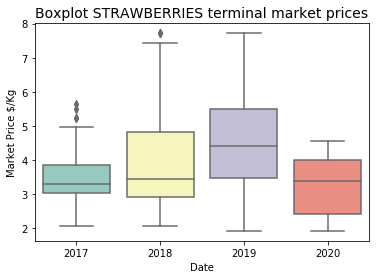

In [121]:
ax = sns.boxplot(x=prices.index.year,
                 y=prices['Avg Price Kg'],
                 data=prices, palette="Set3")
plt.title(f'Boxplot {crop} terminal market prices', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Market Price $/Kg', fontsize=10)
plt.savefig(f'./Results/{crop}/Boxplot_{crop}_US.png')
plt.show()

In [134]:
quantity_complete['Tn'].groupby(quantity_complete.index.year).sum()

Date
2017    116464.28192
2018    112146.08608
2019    124252.45656
2020     82939.29720
Name: Tn, dtype: float64

In [154]:
prices['Avg Price Kg'].groupby(prices.index.year).describe().transpose().to_excel(f'./Results/{crop}/summary.xlsx')

In [161]:
prices_w = prices.resample('W').mean()
prices_w['Week'] = prices_w.index.week
prices_w['Year'] = prices_w.index.year
prices_w[prices_w['Week'] == prices_w.tail(1)['Week'][0]-1][['Avg Price Kg','Week','Year']].to_excel(f'./Results/{crop}/last_price.xlsx')